## Ejemplo de la v.a. uniforme

Sea el experimento aleatorio de lanzar dos dados justos:
* $\Omega = \{1,2,3,4,5,6\}\times \{1,2,3,4,5,6\} $
* $\mathcal{F} = P(\Omega)$
* Para $w=(i,j)$ donde $i,j\in\{1,...,6\}$ talque
   $$\mathbb{P}( \{ \omega \} )=\frac{1}{36}$$

Vamos a definir a la siguiente variable aleatoria:
     $$S:\Omega \to R_{S}$$

donde $R_{S}=\{2,3,4,5,6,7,8,9,10,11,12\}$    

Para que entendamos la ley de una v.a., basta con entender los siguientes datos

$$\{(k,\mathbb{P}(S=k))\}_{k\in R_{S}}$$

Vamos a entender a $S$ como eventos.

Sea $S_{n}$ el evento la suma de las caras es $n$.

---

## Ejercicios


1. Documenta tu colab
2. Calcular la ley de las siguientes variables aleatorias:

     *   La diferencia de las caras es mayor que 1
    
    $$ X =
    \begin{cases}
    1, \quad \text{si } |i-j| > 1\\
    0, \quad \text{e.o.c}
    \end{cases}
    $$

     *   La suma de las caras sea par
    
    $$ X =
    \begin{cases}
    1, \quad \text{si } i+j = 2n \text{ p.a. } n \in \mathbb{N} \\
    0, \quad \text{e.o.c}
    \end{cases}
    $$

3. Verifica en cada caso, que
   $$\sum_{x\in R_{X}}\mathbb{P}(X=x) = 1$$
4. Gráfica y calcula la función de distribución de la v.a. S (la suma de los resultados es n)  

# Solución


In [31]:
# Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from fractions import Fraction
from collections import defaultdict


# Función de probabilidad
def P(A, Omega):
  P = Fraction(len(A),len(Omega))
  return P

# Generamos el experimento de lanzar dos dados justos
L = [i for i in range(1,7)]

# Espacio Muestral
Omega = set(product(L, repeat=2))

---
#Ejercicio 1
Definimos a la variable aleatoria $X$ que modela la diferencia de las caras sea mayor a 1 como sigue:

$$X =
\begin{cases}
  1, \quad \text{si } |i-j| > 1\\
  0, \quad \text{e.o.c}
\end{cases}
$$

Consideremos el experimento aleatorio de lanzar dos dados justos:

\begin{align*}
  \Omega &= \{(i,j)\in\Omega \mid i, j = 1, \dots, 6 \}  \\
  \#(\Omega) &= 36
\end{align*}


In [27]:
# Generamos el espacio muestral
S = {(i,j): abs(i-j) for i,j in Omega}
S = dict(sorted(S.items())) # Ordenamos los resultados
S

{(1, 1): 0,
 (1, 2): 1,
 (1, 3): 2,
 (1, 4): 3,
 (1, 5): 4,
 (1, 6): 5,
 (2, 1): 1,
 (2, 2): 0,
 (2, 3): 1,
 (2, 4): 2,
 (2, 5): 3,
 (2, 6): 4,
 (3, 1): 2,
 (3, 2): 1,
 (3, 3): 0,
 (3, 4): 1,
 (3, 5): 2,
 (3, 6): 3,
 (4, 1): 3,
 (4, 2): 2,
 (4, 3): 1,
 (4, 4): 0,
 (4, 5): 1,
 (4, 6): 2,
 (5, 1): 4,
 (5, 2): 3,
 (5, 3): 2,
 (5, 4): 1,
 (5, 5): 0,
 (5, 6): 1,
 (6, 1): 5,
 (6, 2): 4,
 (6, 3): 3,
 (6, 4): 2,
 (6, 5): 1,
 (6, 6): 0}

### Evento: Diferencia de las caras mayor que 1

\begin{align*}
  E_1 &= \{(i,j)\in\Omega \mid |i-j| > 1 \}  \\
  R_{E_1} &= \{ 2,3,4,5\}  \\
\end{align*}


In [3]:
# Filtramos por el evento de interés: La diferencia de las caras es mayor que 1
evento_interes = {key: value for key, value in S.items() if value > 1}

# Agrupamos por resultado
resultados = defaultdict(set)

for i,j in evento_interes.items():
  resultados[j].add(i) # Al resultado en común asignamos los valores que lo hacen posible

# Ordenamos por key (resultado)
resultados_ordenados = dict(sorted(resultados.items()))
resultados_ordenados

{2: {(1, 3), (2, 4), (3, 1), (3, 5), (4, 2), (4, 6), (5, 3), (6, 4)},
 3: {(1, 4), (2, 5), (3, 6), (4, 1), (5, 2), (6, 3)},
 4: {(1, 5), (2, 6), (5, 1), (6, 2)},
 5: {(1, 6), (6, 1)}}

In [23]:
# Calculamos la función de probabilidad de nuestro evento de interés
fdp = {key : P(value ,Omega) for key, value in resultados_ordenados.items()}
fdp = pd.Series(fdp)

# Mostramos la función de probabilidad
output = f'Función de probabilidad del evento: Diferencias de las caras mayor a uno \n{fdp} \n Probabilidad del evento: {fdp.sum()}'
print(output)

Función de probabilidad del evento: Diferencias de las caras mayor a uno 
2     2/9
3     1/6
4     1/9
5    1/18
dtype: object 
 Probabilidad del evento: 5/9


$$\therefore \mathbb{P}(\text{Diferencia de las caras sea mayor que 1}) = \mathbb{P}(X=1) = \frac{5}{9} $$


### Evento: Diferencia de las caras menor o igual que 1

\begin{align*}
  E_2 &= \{(i,j)\in\Omega \mid |i-j| \leq 1 \}  \\
  R_{E_2} &= \{ 0,1 \}  \\
\end{align*}


In [24]:
# Filtramos por el evento de interés: La diferencia de las caras es mayor que 1
evento_interes = {key: value for key, value in S.items() if value <= 1}

# Agrupamos por resultado
resultados = defaultdict(set)

for i,j in evento_interes.items():
  resultados[j].add(i) # Al resultado en común asignamos los valores que lo hacen posible

# Ordenamos por key (resultado)
resultados_ordenados = dict(sorted(resultados.items()))
resultados_ordenados

{0: {(1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6)},
 1: {(1, 2),
  (2, 1),
  (2, 3),
  (3, 2),
  (3, 4),
  (4, 3),
  (4, 5),
  (5, 4),
  (5, 6),
  (6, 5)}}

In [25]:
# Calculamos la función de probabilidad de nuestro evento de interés
fdp = {key : P(value ,Omega) for key, value in resultados_ordenados.items()}
fdp = pd.Series(fdp)

# Mostramos la función de probabilidad
output = f'Función de probabilidad del evento: Diferencias de las caras mayor a uno \n{fdp} \n Probabilidad del evento: {fdp.sum()}'
print(output)

Función de probabilidad del evento: Diferencias de las caras mayor a uno 
0     1/6
1    5/18
dtype: object 
 Probabilidad del evento: 4/9


$$\therefore \mathbb{P}(\text{Diferencia de las caras sea menor o igual que 1}) = \mathbb{P}(X=0) = \frac{4}{9} $$


$$ f_X(x)=
\begin{cases}
  \frac{5}{9}, \quad \text{si } |i-j| > 1\\
  \frac{4}{9}, \quad \text{e.o.c}
\end{cases}
$$

$$⇒ \sum_xf_X(x) = \frac{5}{9} + \frac{4}{9} = 1 $$

In [61]:
# Verificamos que la fdp sume 1, tomando todos los eventos de S
resultados = defaultdict(set)

# Agrupamos por resultado
for i,j in S.items():
  resultados[j].add(i)

# Ordenamos por key (resultado)
resultados_ordenados = dict(sorted(resultados.items()))

fdpp = {key : P(value ,Omega) for key, value in resultados_ordenados.items()}
fdpp = pd.Series(fdpp)

# Mostramos la función de probabilidad
output = f'Función de probabilidad del evento: Diferencias de las caras mayor a uno \n{fdpp} \n Probabilidad del evento: {fdpp.sum()}'
print(output)

Función de probabilidad del evento: Diferencias de las caras mayor a uno 
0     1/6
1    5/18
2     2/9
3     1/6
4     1/9
5    1/18
dtype: object 
 Probabilidad del evento: 1


In [58]:
# Verificamos que la fdp sume 1, tomando todos los eventos de S
resultados_X = defaultdict(set)

# Agrupamos por resultado
for i,j in S.items():
  if j <= 1:
    resultados_X[0].add(i)
  else:
    resultados_X[1].add(i)

# Ordenamos por key (resultado)
resultados_ordenados_X = dict(sorted(resultados_X.items()))

fdp_X = {key : P(value ,Omega) for key, value in resultados_ordenados.items()}
fdp_X= pd.Series(fdpp)

# Mostramos la función de probabilidad
output = f'Función de probabilidad del evento: Diferencias de las caras mayor a uno \n{fdp_X} \n Probabilidad del evento: {fdp.sum()}'
print(output)

Función de probabilidad del evento: Diferencias de las caras mayor a uno 
0    4/9
1    5/9
dtype: object 
 Probabilidad del evento: 1


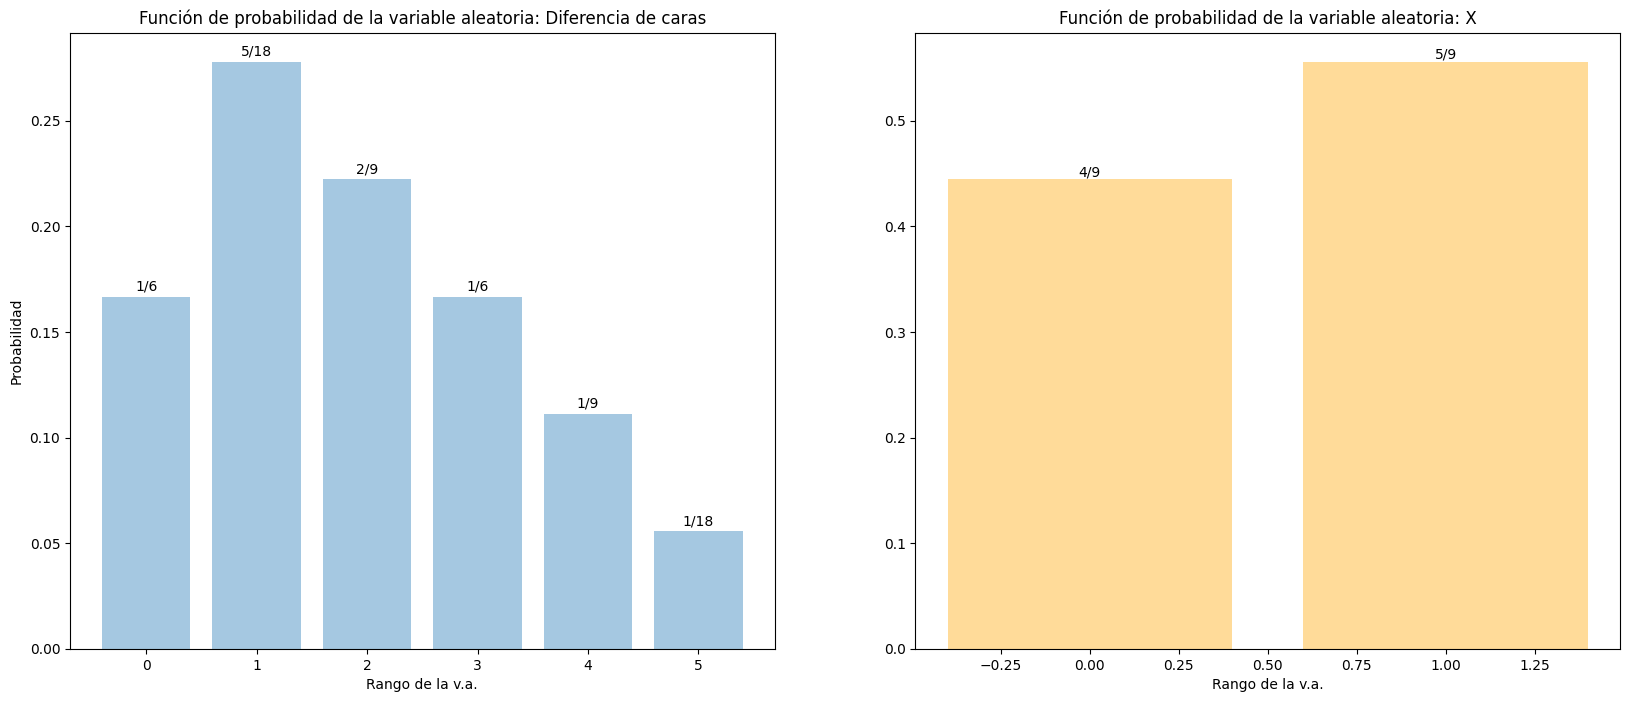

In [73]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))


def addlabels(x, y, show_labels):
  if show_labels:
    for i in range(len(x)):
      ax1.text(i, y[i]+.003, y[i], ha='center')
  else:
    for i in range(len(x)):
      ax2.text(i, y[i]+.003, y[i], ha='center')

ax1.bar(fdpp.index,fdpp.values, alpha = 0.4)
addlabels(fdpp.index, fdpp.values, True)
ax1.set_title('Función de probabilidad de la variable aleatoria: Diferencia de caras')
ax1.set_xlabel('Rango de la v.a.')
ax1.set_ylabel('Probabilidad')


ax2.bar(fdp_X.index,fdp_X.values, color = 'orange', alpha = 0.4)
addlabels(fdp_X.index, fdp_X.values, False)
ax2.set_title('Función de probabilidad de la variable aleatoria: X')
ax2.set_xlabel('Rango de la v.a.')
ax2.set_ylabel('Probabilidad')


plt.show()

---
#Ejercicio 2
Definimos a la variable aleatoria $X$ que modela la suma de caras sea par:

$$X =
\begin{cases}
  1, \quad \text{si } i+j = 2n \text{ p.a. }n \in \mathbb{N}\\
  0, \quad \text{e.o.c}
\end{cases}
$$

Consideremos el experimento aleatorio de lanzar dos dados justos:

\begin{align*}
  \Omega &= \{(i,j)\in\Omega \mid i, j = 1, \dots, 6 \}  \\
  \#(\Omega) &= 36
\end{align*}


In [79]:
# Generamos el espacio muestral de la suma de las caras de un dado
S = {(i,j): (i+j) % 2 == 0 for i,j in Omega}
S = dict(sorted(S.items())) # Ordenamos los resultados
S

{(1, 1): True,
 (1, 2): False,
 (1, 3): True,
 (1, 4): False,
 (1, 5): True,
 (1, 6): False,
 (2, 1): False,
 (2, 2): True,
 (2, 3): False,
 (2, 4): True,
 (2, 5): False,
 (2, 6): True,
 (3, 1): True,
 (3, 2): False,
 (3, 3): True,
 (3, 4): False,
 (3, 5): True,
 (3, 6): False,
 (4, 1): False,
 (4, 2): True,
 (4, 3): False,
 (4, 4): True,
 (4, 5): False,
 (4, 6): True,
 (5, 1): True,
 (5, 2): False,
 (5, 3): True,
 (5, 4): False,
 (5, 5): True,
 (5, 6): False,
 (6, 1): False,
 (6, 2): True,
 (6, 3): False,
 (6, 4): True,
 (6, 5): False,
 (6, 6): True}

In [80]:
# Filtramos por el evento de interés: La suma de las caras sea par
evento_interes = {key: value for key, value in S.items() if value == True}

# Agrupamos por resultado
resultados = defaultdict(set) #lista

for i,j in evento_interes.items():
  resultados[j].add(i) # Al resultado en común asignamos los valores que lo hacen posible

# Ordenamos por key (resultado)
resultados_ordenados = dict(sorted(resultados.items()))
resultados_ordenados

{True: {(1, 1),
  (1, 3),
  (1, 5),
  (2, 2),
  (2, 4),
  (2, 6),
  (3, 1),
  (3, 3),
  (3, 5),
  (4, 2),
  (4, 4),
  (4, 6),
  (5, 1),
  (5, 3),
  (5, 5),
  (6, 2),
  (6, 4),
  (6, 6)}}

In [77]:
# Calculamos la función de probabilidad de nuestro evento
fdp = {key : P(value ,Omega) for key, value in resultados_ordenados.items() }
fdp = pd.Series(fdp)

# Mostramos la función de probabilidad
output = f'Función de probabilidad del evento: Diferencias de las caras mayor a uno \n{fdp} \n Probabilidad del evento: {fdp.sum()}'
print(output)

Función de probabilidad del evento: Diferencias de las caras mayor a uno 
True    1/2
dtype: object 
 Probabilidad del evento: 1/2


In [86]:
# Verificamos que la fdp sume 1, tomando todos los eventos de S
resultados_X = defaultdict(set)

# Agrupamos por resultado
for i,j in S.items():
  if j % 2:
    resultados_X[0].add(i)
  else:
    resultados_X[1].add(i)

# Ordenamos por key (resultado)
resultados_ordenados_X = dict(sorted(resultados_X.items()))

fdp_X = {key : P(value ,Omega) for key, value in resultados_ordenados_X.items()}
fdp_X= pd.Series(fdp_X)

# Mostramos la función de probabilidad
output = f'Función de probabilidad del evento: Suma de caras sea par \n{fdp_X}'
print(output)

Función de probabilidad del evento: Suma de caras sea par 
0    1/2
1    1/2
dtype: object


Text(0, 0.5, 'Probabilidad')

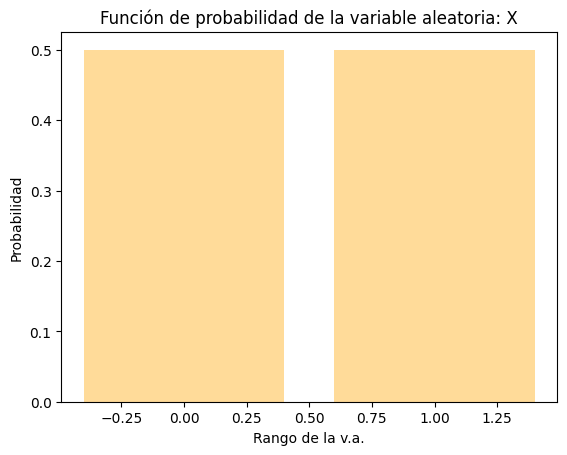

In [87]:
plt.bar(fdp_X.index,fdp_X.values, color = 'orange', alpha = 0.4)
plt.title('Función de probabilidad de la variable aleatoria: X')
plt.xlabel('Rango de la v.a.')
plt.ylabel('Probabilidad')
